## This notebook is used to visualize the model parameters of the ElasticNet models

In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2)))


In [2]:
cell_type = "PBMC"
# path set
input_file_path <- file.path(paste0("../results/","regression/",cell_type))
# read in the data
output_path <- file.path(paste0("../figures/","regression/",cell_type,"/"))
# create output directory if it doesn't exist
dir.create(output_path, recursive = TRUE, showWarnings = FALSE)


In [3]:
files <- list.files(path = input_file_path, pattern = "*.csv", full.names = TRUE)
files

[1] "../results/regression/PBMC/Activin A [NSU]_final__all_nomic.csv"                                       
  [2] "../results/regression/PBMC/Activin A [NSU]_shuffled_baseline__all_nomic.csv"                           
  [3] "../results/regression/PBMC/AITRL (GITR Ligand) [NSU]_final__all_nomic.csv"                             
  [4] "../results/regression/PBMC/AITRL (GITR Ligand) [NSU]_shuffled_baseline__all_nomic.csv"                 
  [5] "../results/regression/PBMC/Amphiregulin [NSU]_final__all_nomic.csv"                                    
  [6] "../results/regression/PBMC/Amphiregulin [NSU]_shuffled_baseline__all_nomic.csv"                        
  [7] "../results/regression/PBMC/Amyloid beta [NSU]_final__all_nomic.csv"                                    
  [8] "../results/regression/PBMC/Amyloid beta [NSU]_shuffled_baseline__all_nomic.csv"                        
  [9] "../results/regression/PBMC/APRIL [NSU]_final__all_nomic.csv"                                           
 [10] "../results/regression/PBMC/APRIL [NSU]_shuffled_baseline__all_nomic.csv"                               
 [11] "../results/regression/PBMC/BAFF [NSU]_final__all_nomic.csv"                                            
 [12] "../results/regression/PBMC/BAFF [NSU]_shuffled_baseline__all_nomic.csv"                                
 [13] "../results/regression/PBMC/BCMA (TNFRSF17) [NSU]_final__all_nomic.csv"                                 
 [14] "../results/regression/PBMC/BCMA (TNFRSF17) [NSU]_shuffled_baseline__all_nomic.csv"                     
 [15] "../results/regression/PBMC/BDNF [NSU]_final__all_nomic.csv"                                            
 [16] "../results/regression/PBMC/BDNF [NSU]_shuffled_baseline__all_nomic.csv"                                
 [17] "../results/regression/PBMC/BMP2 [NSU]_final__all_nomic.csv"                                            
 [18] "../results/regression/PBMC/BMP2 [NSU]_shuffled_baseline__all_nomic.csv"                                
 [19] "../results/regression/PBMC/BMP3 [NSU]_final__all_nomic.csv"                                            
 [20] "../results/regression/PBMC/BMP3 [NSU]_shuffled_baseline__all_nomic.csv"                                
 [21] "../results/regression/PBMC/BMP4 [NSU]_final__all_nomic.csv"                                            
 [22] "../results/regression/PBMC/BMP4 [NSU]_shuffled_baseline__all_nomic.csv"                                
 [23] "../results/regression/PBMC/BMP6 [NSU]_final__all_nomic.csv"                                            
 [24] "../results/regression/PBMC/BMP6 [NSU]_shuffled_baseline__all_nomic.csv"                                
 [25] "../results/regression/PBMC/BMP7 [NSU]_final__all_nomic.csv"                                            
 [26] "../results/regression/PBMC/BMP7 [NSU]_shuffled_baseline__all_nomic.csv"                                
 [27] "../results/regression/PBMC/BMP9 [NSU]_final__all_nomic.csv"                                            
 [28] "../results/regression/PBMC/BMP9 [NSU]_shuffled_baseline__all_nomic.csv"                                
 [29] "../results/regression/PBMC/C5_C5a [NSU]_final__all_nomic.csv"                                          
 [30] "../results/regression/PBMC/C5_C5a [NSU]_shuffled_baseline__all_nomic.csv"                              
 [31] "../results/regression/PBMC/Calbindin [NSU]_final__all_nomic.csv"                                       
 [32] "../results/regression/PBMC/Calbindin [NSU]_shuffled_baseline__all_nomic.csv"                           
 [33] "../results/regression/PBMC/CCL1 [NSU]_final__all_nomic.csv"                                            
 [34] "../results/regression/PBMC/CCL1 [NSU]_shuffled_baseline__all_nomic.csv"                                
 [35] "../results/regression/PBMC/CCL11 [NSU]_final__all_nomic.csv"                                           
 [36] "../results/regression/PBMC/CCL11 [NSU]_shuffled_baseline__all_nomic.csv"                               
 [37] 

In [4]:
# define empty df with column names
model_df <- data.frame(
    secreted_proteins = character(),
    shuffle = character(),
    l1_ratio = numeric(),
    alpha = numeric(),
    r2 = numeric()
)


In [5]:
for (i in 1:length(files)){
    df <- read.csv(files[i], header = TRUE, sep = ",", stringsAsFactors = FALSE)
    df <- df[1,]
    # drop columns that are not needed
    df <- df[,c("secreted_proteins","shuffle","l1_ratio","alpha","r2")]
    # append to model_df
    model_df <- rbind(model_df, df)
}
head(model_df)


,secreted_proteins,shuffle,l1_ratio,alpha,r2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Activin A [NSU],final,0.10,0.001,0.86405942
2,Activin A [NSU],shuffled,0.20,0.100,-0.12442747
3,AITRL (GITR Ligand) [NSU],final,0.99,0.001,-0.23052689
4,AITRL (GITR Ligand) [NSU],shuffled,0.20,0.100,-0.21081457
5,Amphiregulin [NSU],final,0.20,0.001,0.91250921
6,Amphiregulin [NSU],shuffled,0.30,0.100,-0.06632295


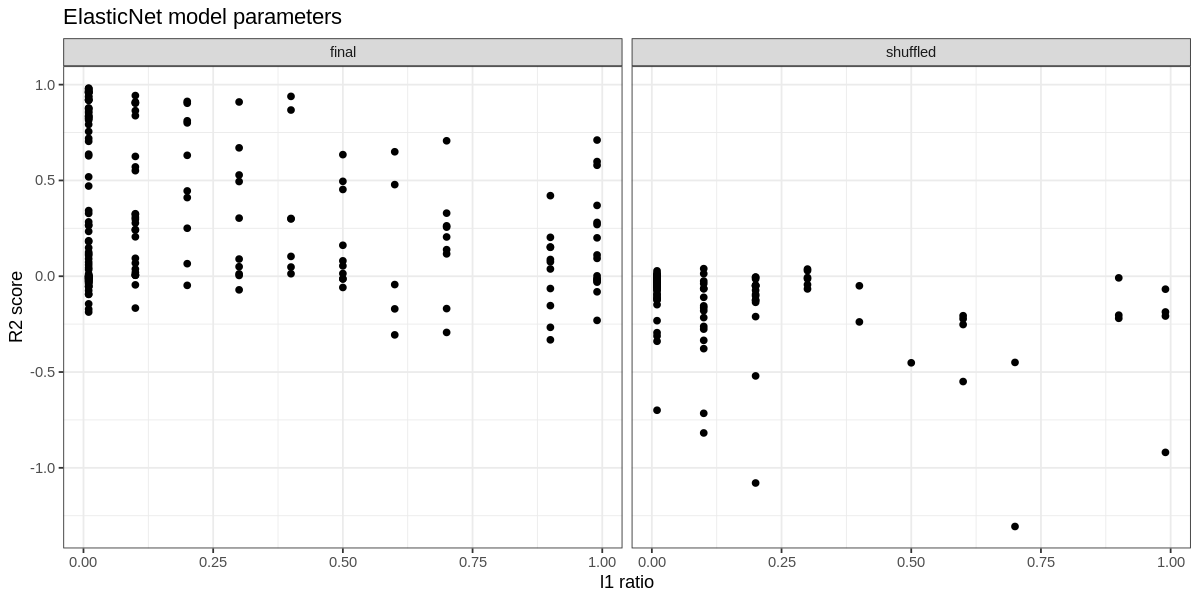

In [6]:
# plot size
options(repr.plot.width=10, repr.plot.height=5)
# plot model parameters
model_params_plot <- (
    ggplot(model_df, aes(x=l1_ratio, y=r2))
    + geom_point()
    + theme_bw()
    + facet_wrap(.~shuffle, ncol=2)
    + labs(x="l1 ratio", y="R2 score")
    + ggtitle("ElasticNet model parameters")
)
model_params_plot
